In [4]:
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import scipy.fftpack as fourier
import time
import matplotlib as mp


# atualização espacial dos campos:

def campos_espaciais(n):
    #atualização do campo magnético --------
    for i in range(0, I-1):
        H[i] = alpha[0][i]*H[i] + alpha[1][i]*(E[i+1] - E[i])
        
    #fonte de corrente:
    E[Ij] = E[Ij] + beta[2][Ij] * s(fc,t[n])
    
    #atualização do campo elétrico -------
    for i in range(1, I-1):
        E[i] = beta[0][i]*E[i] + beta[1][i]*(H[i] - H[i-1])
        
# -------------------------------------- #

#função da fonte (source) 
def s(fc,t):
    a0 = 0.35322222
    a1 = -0.488
    a2 = 0.145
    a3 = -0.01022222
    
    T = 1/fc
    
    soluc = a0 + a1*np.cos(2*np.pi*t/T) + a2*np.cos(2*2*np.pi*t/T) + a3*np.cos(2*3*np.pi*t/T)
    
    return soluc

#---------------------------------------------------------------------------#

#parâmetros da cavidade ressonante:

a = 0
b = 1
L = b - a
fmin = 0
fmax = 3e9
fc = fmax / 3.351  #frequência caracteristica do sinal BHW
T = 1 / fc
e0 = 8.854187817e-12  #permissividade do vácuo
m0 = (4e-7)*np.pi
c0 = 1/np.sqrt(e0*m0)  # velocidade da luz
lamb_min = c0/fmax

#posição da fonte
zj = np.sqrt(2)/2

#posição do observador
zo = np.sqrt(2)/4

##---------------------------------------------------------------------------#

#Parâmetros FDTD:
PPW = 10 # points per wavelens
CFL = 0.9 # condição de Courant-Friedrichs-Lewy

#----------------------------------------------------------------------------#

#discretização do espaço e tempo

dz = lamb_min/PPW
I = int(np.ceil(L/dz)+1)       # números de intervalos
z = np.linspace(a,b,I)    # espaço para campo elétrico
z2 = np.linspace(a+0.5*dz,b-0.5*dz,I-1) # espaço para campo magnético
Ij = int(np.ceil(zj/dz) + 1)  # posição da fonte
Io = int(np.ceil(zo/dz) + 1)  # posição do obervador
dt = CFL * dz/c0          # usando o critério de estabilidade
NT = 2                    # número de período sinal BHW
N = int(np.ceil(T * NT/dt))
t = np.linspace(0, (N-1)*dt, N)  # tempo


#---------------------------------------------------------------------------#

#discretização dos campos e parâmetros
E = np.zeros(I)
H = np.zeros(I-1)
Eo = np.zeros(N)
alpha = np.ones((3,I-1))
beta = np.ones((3,I))


mr = 1            # permeabilidade relativa (vácuo)
er = 1            # permissividade relativa (vácuo)
sg = 0            # sigma  

''' para um material diferente do vácuo cada uma das constantes "mr" e "er"
devem ter uma posição relacionadas ao número de intervalos.
Ou seja, devem ser um arrays
'''

mu = mr * m0
eps = er * e0

alpha[1] = alpha[1] * dt / (mu * dz)
beta[0] = beta[0] * (2*eps-sg*dt) / (2*eps+sg*dt)
beta[1] = beta[1] * 2*dt / (dz*(2*eps+sg*dt))
beta[2] = beta[2] * 2*dt / (2*eps+sg*dt)





Text(0.5, 0, 'z')

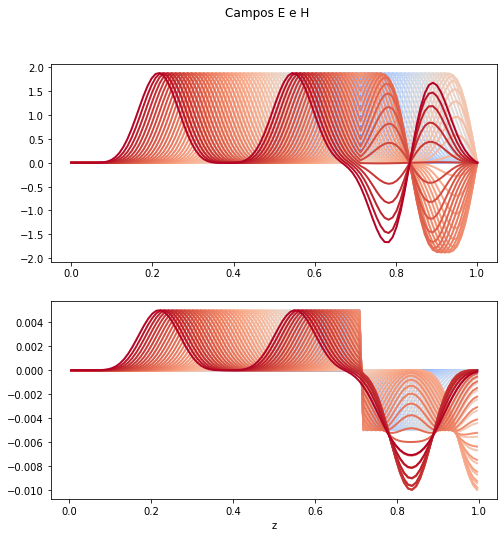

In [5]:
        
# -------------------------------------- #

# Criação dos gráficos  ----- tipo 01

fig = plt.figure(figsize=(8,8))
aE = fig.add_subplot(211)
aH = fig.add_subplot(212)

# #colors coolwarm
cor = plt.get_cmap('coolwarm',N)

# plotagem ------

for n in range(N):
    campos_espaciais(n)
    aE.plot(z, E, color=cor(n), linewidth=2)
    aH.plot(z2, H, color=cor(n), linewidth=2)
    Eo[n] = E[Io]
plt.suptitle('Campos E e H')   
plt.xlabel('z')

In [6]:
Ef = fourier.fft(Eo)
Ef = fourier.fftshift(Ef)
absEf = (1/N)*np.abs(Ef)
angEf = (1/N)*np.unwrap(np.angle(Ef))
freq = fourier.fftfreq(N, dt)
freq = fourier.fftshift(freq)
N1 = int(np.ceil(freq.size/2)) - 1
N2 = N1 + 100

# OBSERVADOR



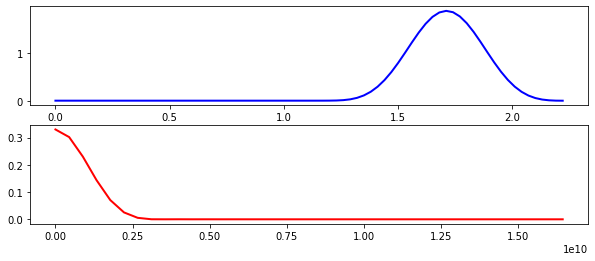

In [7]:
fig2 = plt.figure(figsize = (10, 4))
at = fig2.add_subplot(211)
af = fig2.add_subplot(212)
at.plot(t, Eo, lw = 2, color='blue')
af.plot(freq[N1:N2], absEf[N1:N2], lw = 2, color='red')




In [ ]:

fig3 = plt.figure()
aE2 = fig3.add_subplot(211)
aH2 = fig3.add_subplot(212)

f_E, = aE2.plot([], [], linewidth = 2.5, color = 'blue')
f_H, = aH2.plot([], [], linewidth = 2.5, color = 'red')

def animacion(n):
    campos_espaciais(n)
    f_E.set_data(z, E)
    f_H.set_data(z2, H)
    aE2.set(xlim=(min(z),max(z)), ylim=(-3,3))
    aH2.set(xlim=(min(z),max(z)), ylim=(-0.01,0.01))


#variaveis de plotagem
ani = animation.FuncAnimation(fig, func=animacion, 
                    frames=range(len(t)), 
                    interval = 100)

plt.show()
